In [29]:
import torch
import numpy as np
from torch2jax import j2t,t2j
import jax
import sys,os
from brax.io.torch import jax_to_torch 
import time
import copy

os.environ['CUDA_VISIBLE_DEVICES'] ='1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.25'

import jax.numpy as jnx

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(os.path.abspath(os.getcwd()))

#jax.config.update("jax_default_device", jax.devices()[2])

from ensemble.ensemble import EnsembleModels

from Trajectory.walker_mpc import Walker_MPC


In [30]:
f_size = (8.0,6.0)
l_wid = 4
t_size = 24
lable_size = 28


In [31]:
from matplotlib import pyplot as plt

In [32]:
#cartpole
cartpole_gt = np.load('../Data/Cartpole/gt.npy')
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/RA/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/BT/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',cartpole_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt 148.63144
ours 137.02963 8.450431
BT 101.40778 39.157127


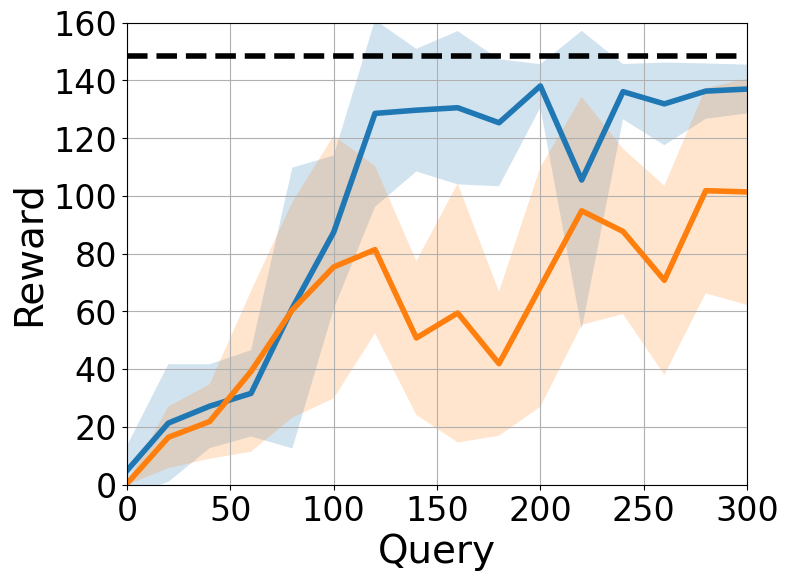

In [33]:
plt.figure(figsize=f_size)
plt.tight_layout()
plt.grid()
#plt.title("Cartpole Reward: No Error")
#plt.title("Cartpole-Swingup",fontsize = 16)
plt.plot(np.arange(0,32,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,32,2)*10,results_BT,label='Baseline',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(300)*cartpole_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)
plt.ylim(0,160)
plt.xlim(0,300)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)
plt.savefig('../Data/Figs/err_1/cartpole.jpg',bbox_inches='tight')
#plt.legend(fontsize=16)

In [34]:
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/RA/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/BT/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)
print('gt',cartpole_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt 148.63144
ours 111.3113 16.83937
BT 42.78637 23.342733


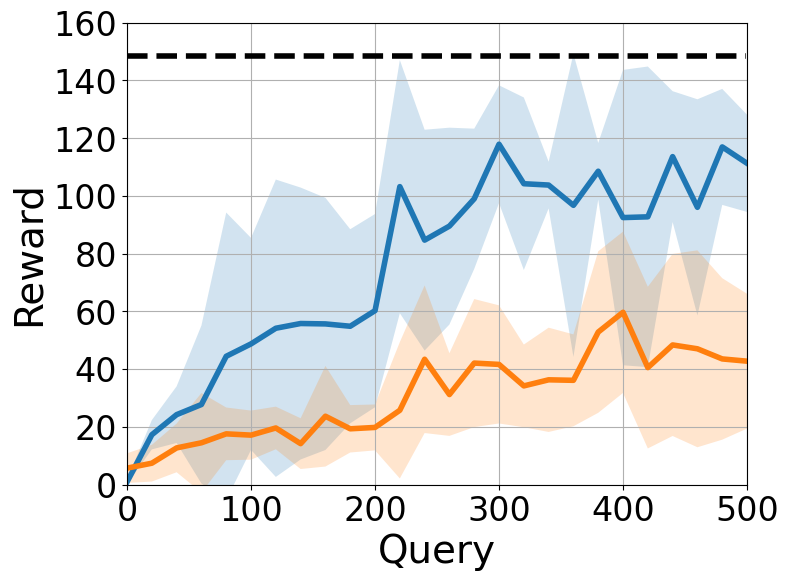

In [35]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Cartpole reward: 20% Error")
#plt.title("Cartpole-Swingup",fontsize = 16)
plt.plot(np.arange(0,52,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(500)*cartpole_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(0,160)
plt.xlim(0,500)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)
plt.savefig('../Data/Figs/err_3/cartpole.jpg',bbox_inches="tight")
#plt.legend(fontsize=16)

In [36]:
#walker
walker_gt = np.load('../Data/Walker/gt.npy')
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/RA/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,81,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/BT/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,81,5):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',walker_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt 472.99542
ours 441.3641 15.013198
BT 421.15958 20.612274


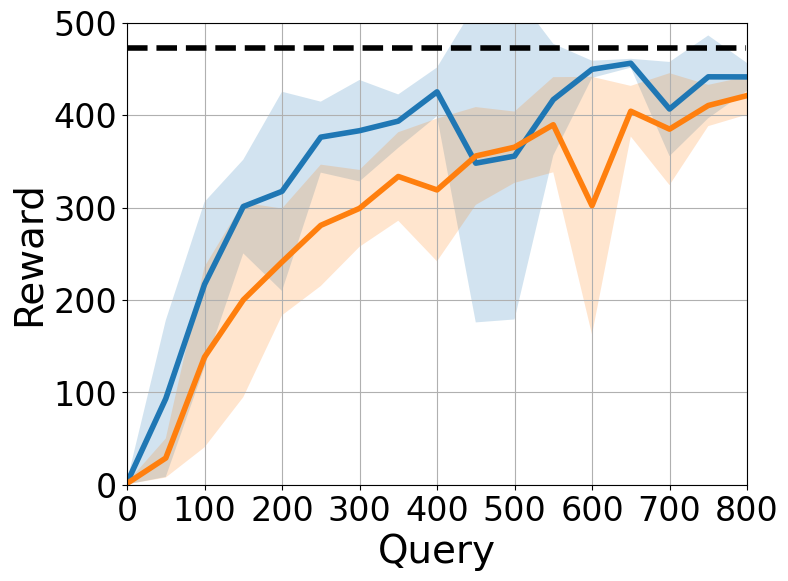

In [37]:
plt.figure(figsize=f_size)
#plt.title("Walker-Walk",fontsize = 16)
plt.grid()
plt.plot(np.arange(0,82,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,82,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,82,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,82,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(800)*walker_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

#plt.legend()

plt.ylim(0,500)
plt.xlim(0,800)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_1/walker.jpg',bbox_inches="tight")

In [38]:
results_ours = []
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/RA/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/BT/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',walker_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt 472.99542
ours 417.1928 12.260955
BT 277.01343 62.29897


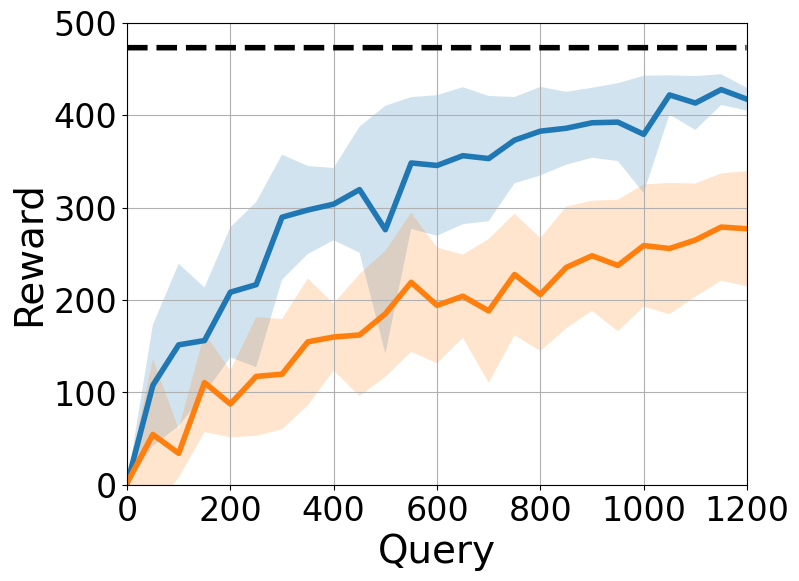

In [39]:
plt.figure(figsize=f_size)
#plt.title("Walker-Walk",fontsize = 16)
plt.grid()
plt.plot(np.arange(0,121,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,121,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,121,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,121,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(1200)*walker_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

#plt.legend()
plt.ylim(0,500)
plt.xlim(0,1200)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)
plt.savefig('../Data/Figs/err_3/walker.jpg',bbox_inches="tight")

In [40]:
#humanoid
humanoid_gt = np.load('../Data/Humanoid_New/gt.npy')

results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Humanoid_New/RA/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,101,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Humanoid_New/BT/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,101,5):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',humanoid_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt 206.70087
ours 147.99783 14.918531
BT 85.59458 25.880953


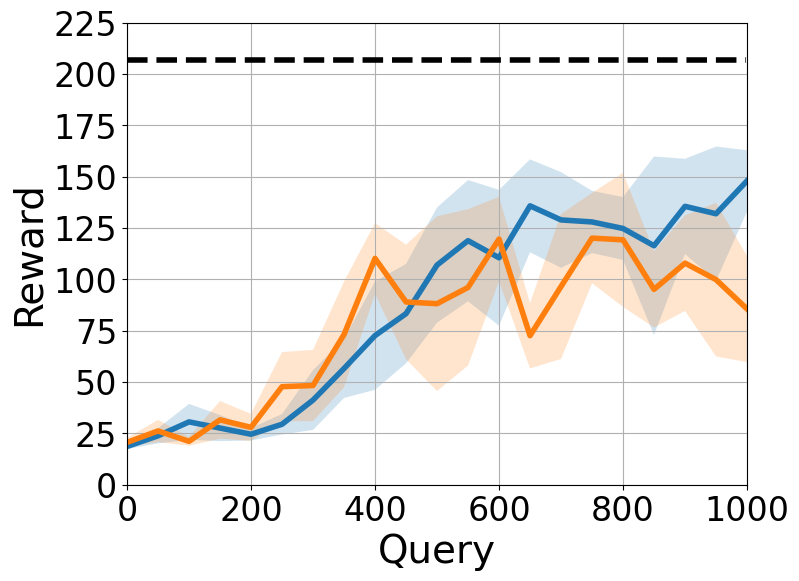

In [41]:
plt.figure(figsize=f_size)
#plt.title("Humanoid-Standup",fontsize = 16)
plt.grid()
plt.plot(np.arange(0,101,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,101,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,101,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,101,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(1000)*humanoid_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(0,225)
plt.xlim(0,1000)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_1/humanoid.jpg',bbox_inches="tight")

In [42]:
#humanoid
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Humanoid_New/RA/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,151,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Humanoid_New/BT/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,151,5):
        #print(res[str(i)])
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',humanoid_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])


gt 206.70087
ours 106.47349 26.991129
BT 69.34806 12.026026


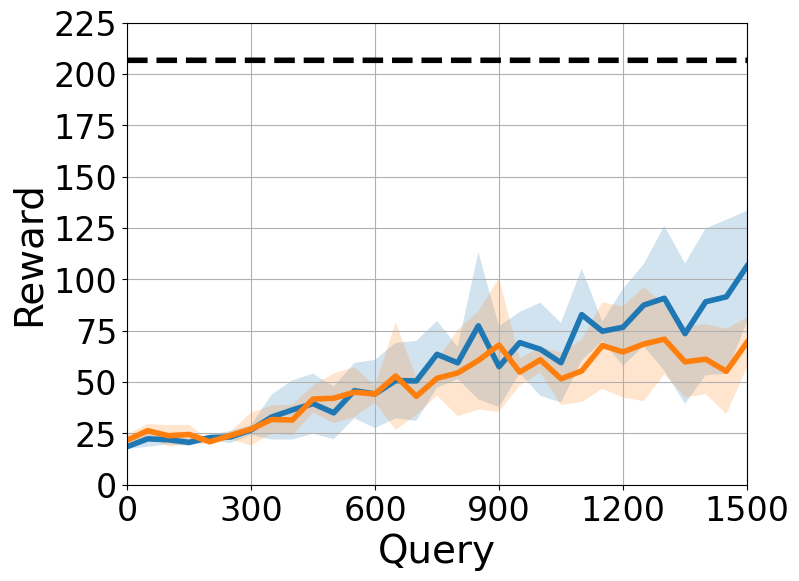

In [43]:
plt.figure(figsize=f_size)
#plt.title("Humanoid-Standup",fontsize = 16)
plt.grid()
plt.plot(np.arange(0,151,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,151,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,151,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,151,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(1600)*humanoid_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(0,225)
plt.xlim(0,1500)
plt.xticks(np.linspace(0,1500,6),fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_3/humanoid.jpg',bbox_inches="tight")

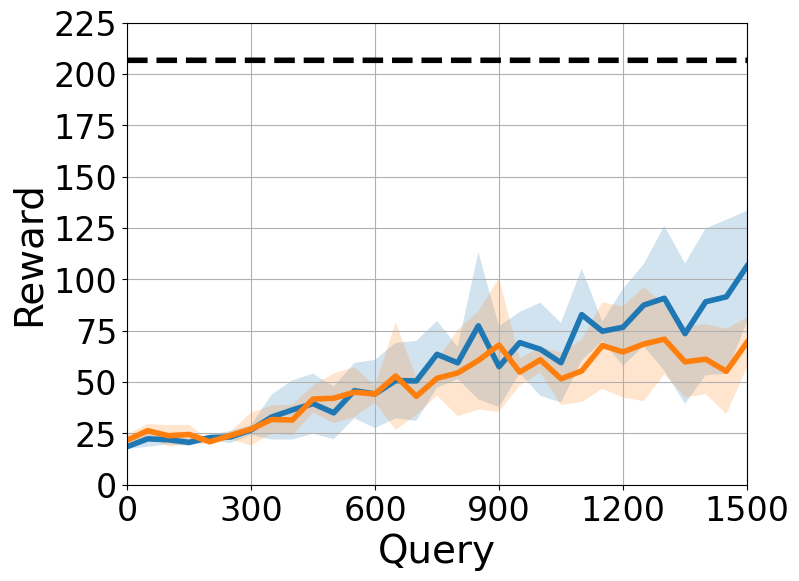

In [44]:
plt.figure(figsize=f_size)
#plt.title("Humanoid-Standup",fontsize = 16)
plt.grid()
plt.plot(np.arange(0,151,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,151,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,151,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,151,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(1600)*humanoid_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(0,225)
plt.xlim(0,1500)
plt.xticks(np.linspace(0,1500,6),fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_3/humanoid.jpg',bbox_inches="tight")

In [45]:
#go2
go2_gt = np.load('../Data/Go2_big/gt.npy')
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Go2_big/RA/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,85,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Go2_big/BT/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,85,5):
        #print(res[str(i)])
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',go2_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -30.646456
ours -36.71772 4.337563
BT -84.149635 32.006435


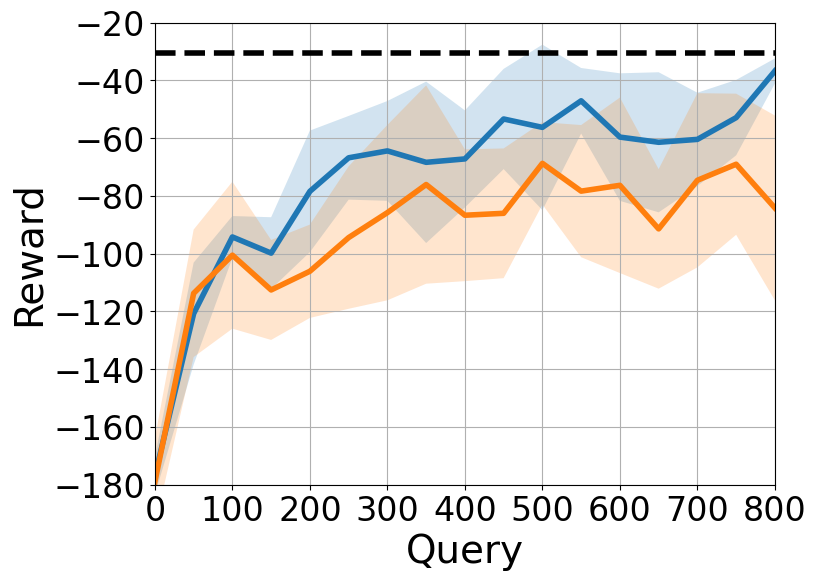

In [46]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Quadruped Locomotion",fontsize = 16)
plt.plot(np.arange(0,85,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,85,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,85,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,85,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(1200)*go2_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

#plt.legend()
plt.ylim(-180,-20)
plt.xlim(0,800)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)
plt.savefig('../Data/Figs/err_1/go2.jpg',bbox_inches="tight")

In [51]:
#go2
go2_gt = np.load('../Data/Go2_big/gt.npy')
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Go2_big/RA/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,125,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Go2_big/BT/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,125,5):
        #print(res[str(i)])
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',go2_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -30.646456
ours -80.64533 26.403261
BT -85.485596 21.063456


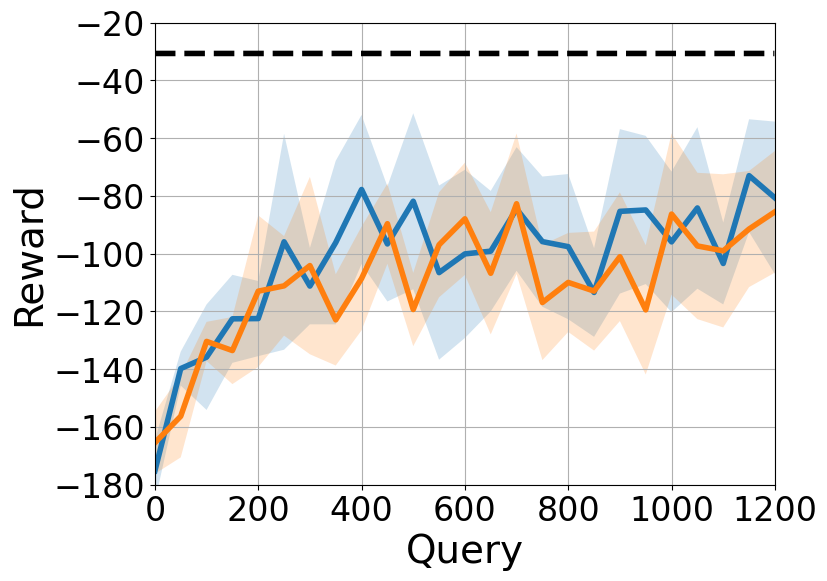

In [52]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Quadruped Locomotion",fontsize = 16)
plt.plot(np.arange(0,125,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,125,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,125,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,125,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(1200)*go2_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

#plt.legend()
plt.ylim(-180,-20)
plt.xlim(0,1200)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_3/go2.jpg',bbox_inches="tight")

In [21]:
#allegro
cube_gt = np.load("../Data/Allegro/Cube/gt.npy")
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Cube/RA/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Cube/BT/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',cube_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -0.1391674
ours -0.22175343 0.05692548
BT -0.291045 0.091697745


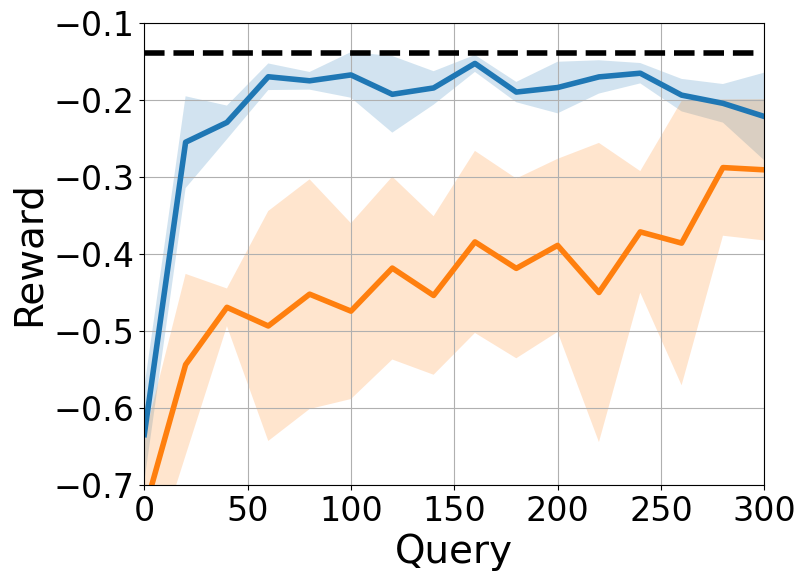

In [22]:
plt.figure(figsize=f_size)
#plt.title("Dexterous Manipulation-Cube",fontsize = 16)
plt.grid()
#plt.title("Allegro reward Cube: No Error")
plt.plot(np.arange(0,32,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,32,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
#plt.legend()

plt.plot(np.ones(300)*cube_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(-0.7,-0.1)
plt.xlim(0,300)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_1/cube.jpg',bbox_inches="tight")


In [23]:
#allegro
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Cube/RA/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,42,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Cube/BT/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,42,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',cube_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -0.1391674
ours -0.22664663 0.057547092
BT -0.3427723 0.023820864


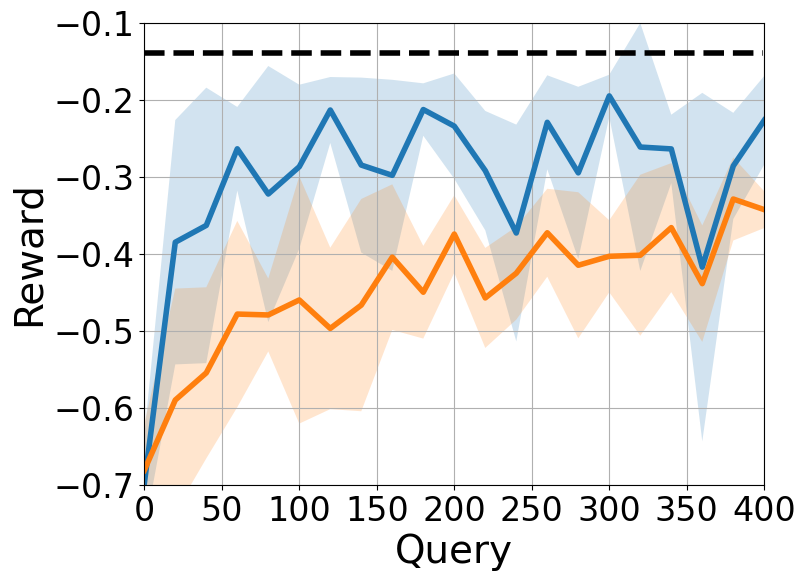

In [24]:
plt.figure(figsize=f_size)
#plt.title("Dexterous Manipulation-Cube",fontsize = 16)
plt.grid()
#plt.title("Allegro reward Cube: 20% Error")
plt.plot(np.arange(0,42,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,42,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,42,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,42,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
#plt.legend()
plt.plot(np.ones(400)*cube_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)
plt.ylim(-0.7,-0.1)
plt.xlim(0,400)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_3/cube.jpg',bbox_inches="tight")

In [25]:
bunny_gt = np.load("../Data/Allegro/Bunny/gt.npy")
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Bunny/RA/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_ours.append(results)

std_ours = np.std(results_ours,axis=0)   
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (1,2,3,4):
    res = np.load('../Data/Allegro/Bunny/BT/error_1/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_BT.append(results)
    
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',bunny_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -0.1552223
ours -0.27834803 0.21838923
BT -0.3563068 0.2035138


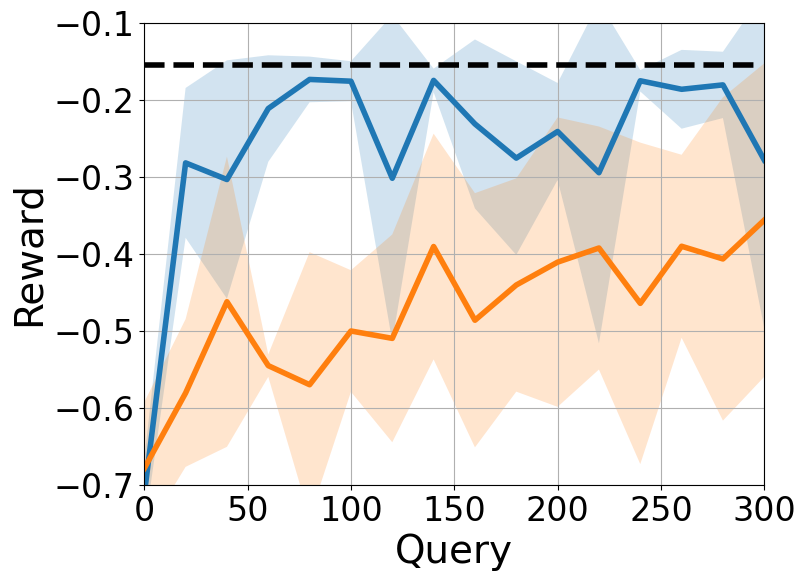

In [26]:
plt.figure(figsize=f_size)
#plt.title("Dexterous Manipulation-Bunny",fontsize = 16)
plt.grid()
#plt.title("Allegro reward Bunny: No Error")
plt.plot(np.arange(0,32,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,32,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
#plt.legend()
plt.plot(np.ones(300)*bunny_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(-0.7,-0.1)
plt.xlim(0,300)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_1/bunny.jpg',bbox_inches="tight")


In [27]:
#allegro
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Bunny/RA/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,42,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Bunny/BT/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,42,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',cube_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -0.1391674
ours -0.2634666 0.050785303
BT -0.5046088 0.0260289


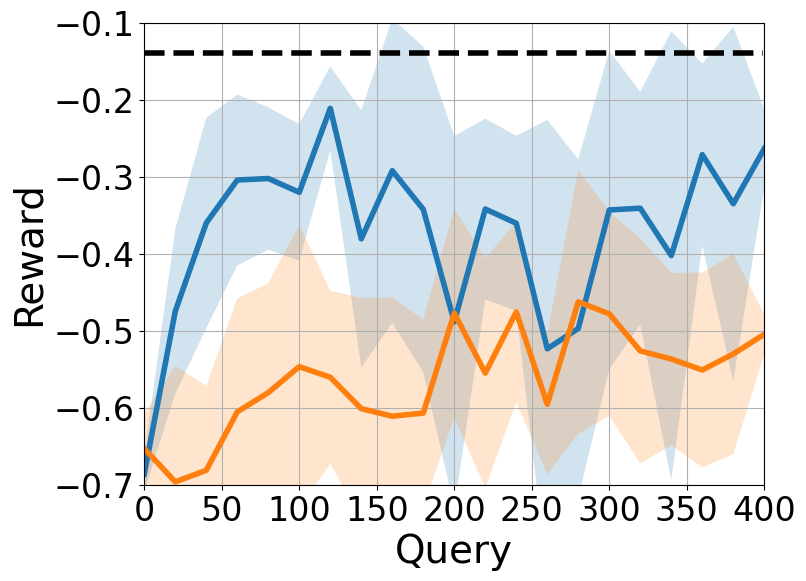

In [28]:
plt.figure(figsize=f_size)
#plt.title("Dexterous Manipulation-Cube",fontsize = 16)
plt.grid()
#plt.title("Allegro reward Cube: 20% Error")
plt.plot(np.arange(0,42,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,42,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,42,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,42,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
#plt.legend()
plt.plot(np.ones(400)*cube_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)
plt.ylim(-0.7,-0.1)
plt.xlim(0,400)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_3/bunny.jpg',bbox_inches="tight")